In [86]:
%matplotlib inline

# install the gvmagic extension by uncommenting/running it once: 
# %install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [87]:
import os
import discoursegraphs as dg
import networkx as nx

from gvmagic import rundot

In [88]:
CORPUS_DIR = os.path.expanduser('~/corpora/potsdam-commentary-corpus-2.0.0/')
MAZ_FILENAME = 'maz-1423.rs3'

rdg = dg.read_rs3(os.path.join(CORPUS_DIR, 'rst', MAZ_FILENAME))
rstgraph_untokenized = dg.read_rs3(os.path.join(CORPUS_DIR, 'rst', MAZ_FILENAME), tokenize=False)

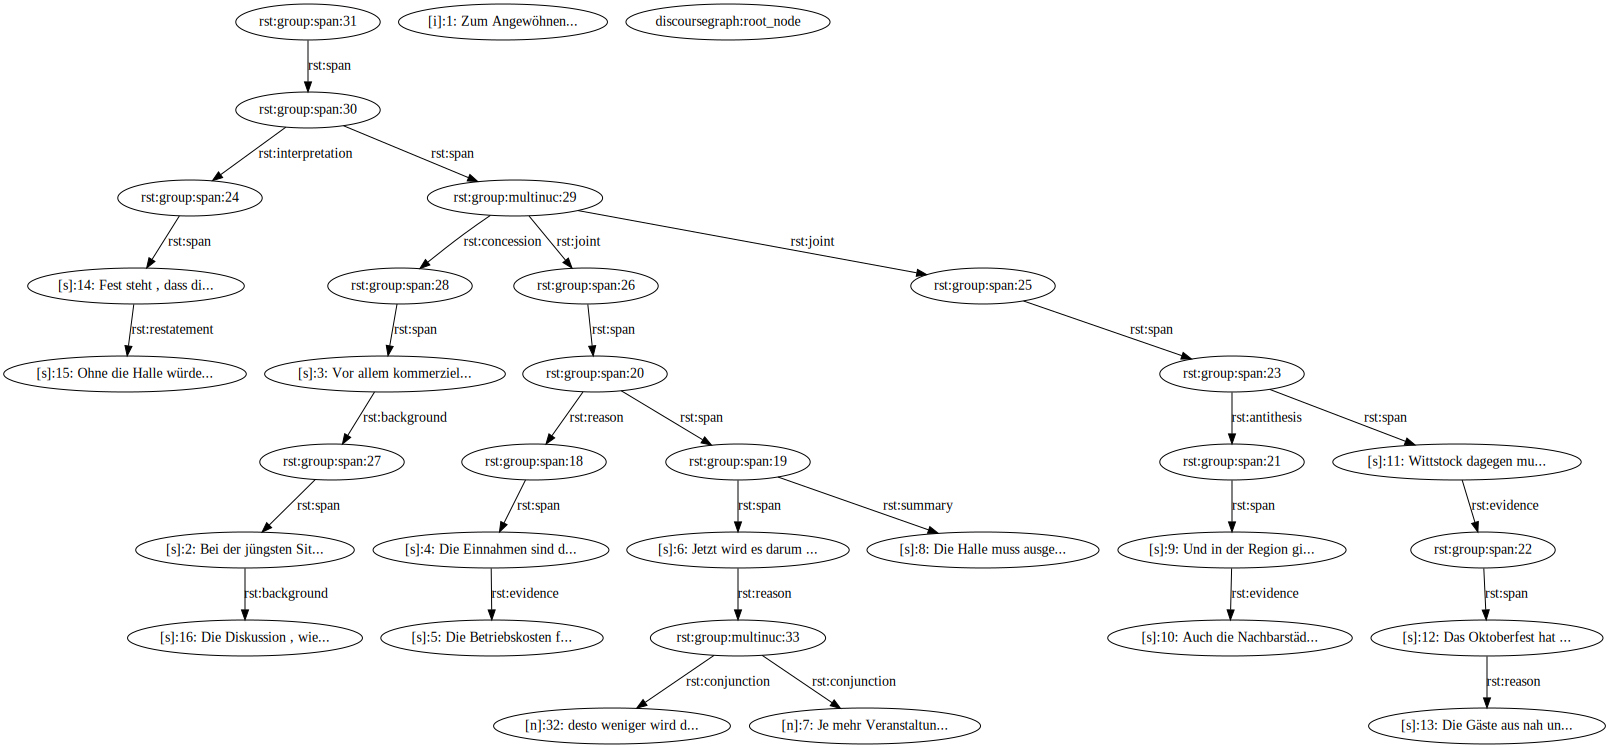

In [89]:
%dotstr dg.print_dot(rstgraph_untokenized)

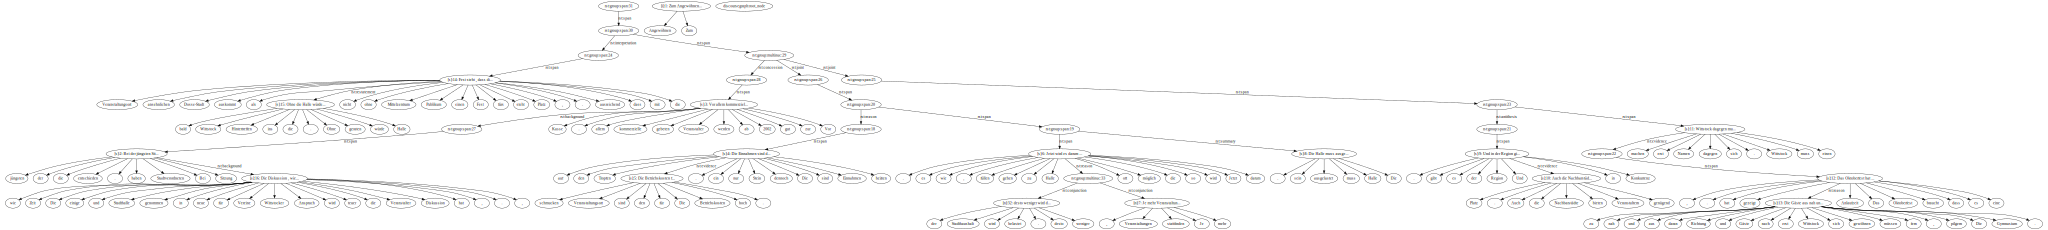

In [90]:
%dotstr dg.print_dot(rdg)

In [91]:
rdg_stripped = dg.readwrite.dot.preprocess_for_pydot(rdg)

In [93]:
rdg_stripped_dfs = nx.dfs_tree(rdg_stripped, '"{}"'.format(rdg.root))

In [94]:
preordered_rdg_nodes = nx.dfs_preorder_nodes(rdg_stripped, '"{}"'.format(rdg.root))

In [95]:
# for n in preordered_rdg_nodes:
#     print n,

In [96]:
postordered_rdg_nodes = nx.dfs_postorder_nodes(rdg_stripped, '"{}"'.format(rdg.root))

# for n in postordered_rdg_nodes:
#     print n,

In [97]:
successors_rdg_nodes = nx.dfs_successors(rdg_stripped, '"{}"'.format(rdg.root))

In [98]:
for source_node in successors_rdg_nodes:
    print source_node, sorted(successors_rdg_nodes[source_node], key=dg.util.natural_sort_key)

"rst:12" [u'"rst:13"', u'"rst:rst:12_0"', u'"rst:rst:12_1"', u'"rst:rst:12_2"', u'"rst:rst:12_3"', u'"rst:rst:12_4"', u'"rst:rst:12_5"', u'"rst:rst:12_6"', u'"rst:rst:12_7"', u'"rst:rst:12_8"', u'"rst:rst:12_9"', u'"rst:rst:12_10"']
"rst:32" [u'"rst:rst:32_0"', u'"rst:rst:32_1"', u'"rst:rst:32_2"', u'"rst:rst:32_3"', u'"rst:rst:32_4"', u'"rst:rst:32_5"', u'"rst:rst:32_6"']
"rst:3" [u'"rst:27"', u'"rst:rst:3_0"', u'"rst:rst:3_1"', u'"rst:rst:3_2"', u'"rst:rst:3_3"', u'"rst:rst:3_4"', u'"rst:rst:3_5"', u'"rst:rst:3_6"', u'"rst:rst:3_7"', u'"rst:rst:3_8"', u'"rst:rst:3_9"', u'"rst:rst:3_10"', u'"rst:rst:3_11"']
"rst:2" [u'"rst:16"', u'"rst:rst:2_0"', u'"rst:rst:2_1"', u'"rst:rst:2_2"', u'"rst:rst:2_3"', u'"rst:rst:2_4"', u'"rst:rst:2_5"', u'"rst:rst:2_6"', u'"rst:rst:2_7"', u'"rst:rst:2_8"']
"rst:7" [u'"rst:rst:7_0"', u'"rst:rst:7_1"', u'"rst:rst:7_2"', u'"rst:rst:7_3"', u'"rst:rst:7_4"']
"rst:6" [u'"rst:33"', u'"rst:rst:6_0"', u'"rst:rst:6_1"', u'"rst:rst:6_2"', u'"rst:rst:6_3"', u'"rst:

In [99]:
dfs_labeled_rdg_edges = nx.dfs_labeled_edges(rdg_stripped, '"{}"'.format(rdg.root))

In [100]:
# for e in dfs_labeled_rdg_edges:
#     print e

In [101]:
[(src, trg, attrs) for (src, trg, attrs) in rdg.edges(data=True) if attrs.get('edge_type') not in ('dominates, spans')]

[]

In [131]:
import pydot
from networkx.drawing.nx_pydot import make_str

def to_pydot(M):
    """Return a pydot graph from a MultiDiGraph M.

    Parameters
    ----------
    M : networkx.MultiDiGraph
      A graph created with discoursegraphs and then stripped with ``preprocess_for_pydot()``
    """
    graph_type='digraph'
    name = M.graph.get('name')
    graph_defaults=M.graph.get('graph',{})
    P = pydot.Dot('"%s"'%name,graph_type=graph_type,strict=False,
                  **graph_defaults)

    for n,nodedata in sorted(M.nodes_iter(data=True), key=dg.util.natural_sort_key):
        str_nodedata=dict((k,make_str(v)) for k,v in nodedata.items())
        p=pydot.Node(make_str(n),**str_nodedata)
        P.add_node(p)

    for u,v,key,edgedata in sorted(M.edges_iter(data=True,keys=True), key=dg.util.natural_sort_key):
        str_edgedata=dict((k,make_str(v)) for k,v in edgedata.items())
        edge=pydot.Edge(make_str(u),make_str(v),key=make_str(key),**str_edgedata)
        P.add_edge(edge)
    return P

In [135]:
rdg_stripped = dg.readwrite.dot.preprocess_for_pydot(rstgraph_untokenized)

In [136]:
rdg_pydot = to_pydot(rdg_stripped)

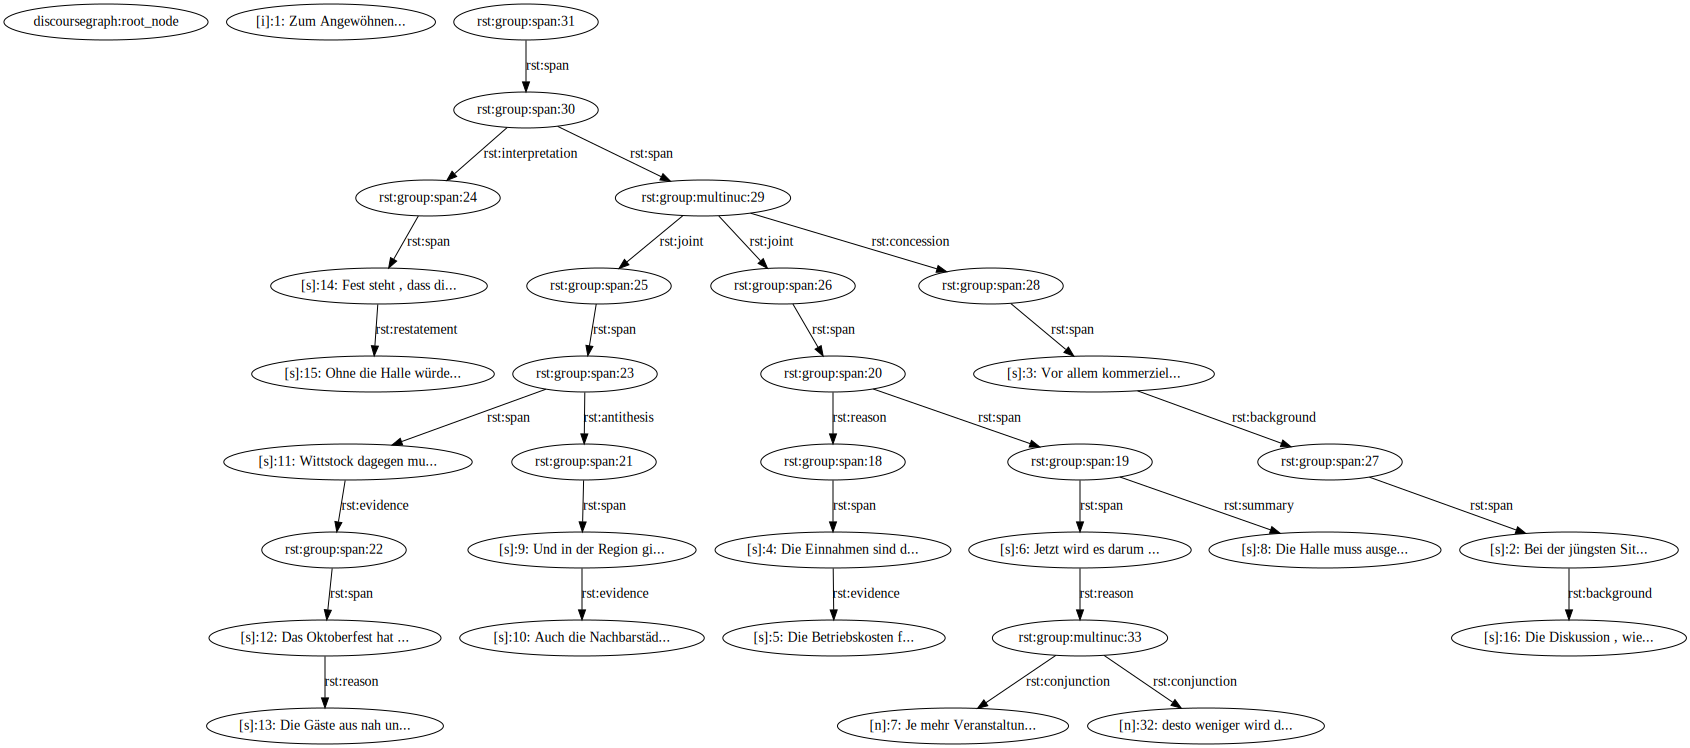

In [137]:
%dotstr rdg_pydot.to_string()

In [126]:
%dotstr to_pydot(rdg).to_string()

In [147]:
tdg = dg.read_tiger(os.path.join(CORPUS_DIR, 'syntax', 'tiger_test.xml'))

In [148]:
tdg_stripped = dg.readwrite.dot.preprocess_for_pydot(tdg)
tdg_pydot = to_pydot(tdg_stripped)

In [162]:
with open('/tmp/tdg_stripped.dot', 'w') as of:
    of.write(tdg_pydot.to_string().encode('utf8'))

In [150]:
print tdg_pydot.to_string()

digraph "tiger_test.xml" {
"VROOT-s2104";
"discoursegraph:root_node";
"s2104_1" [label="Der"];
"s2104_2" [label="rot-grünen"];
"s2104_3" [label="Koalition"];
"s2104_4" [label="steht"];
"s2104_5" [label="eine"];
"s2104_6" [label="Zerreißprobe"];
"s2104_7" [label="bevor"];
"s2104_8" [label=":"];
"s2104_500" [label="NP"];
"s2104_501" [label="NP"];
"s2104_502" [label="S"];
"tiger:root_node";
"VROOT-s2104" -> "discoursegraph:root_node"  [key=0];
"VROOT-s2104" -> "s2104_8"  [key=0];
"VROOT-s2104" -> "s2104_502"  [key=0];
"s2104_500" -> "s2104_1"  [key=0, label="NK"];
"s2104_500" -> "s2104_2"  [key=0, label="NK"];
"s2104_500" -> "s2104_3"  [key=0, label="NK"];
"s2104_501" -> "s2104_5"  [key=0, label="NK"];
"s2104_501" -> "s2104_6"  [key=0, label="NK"];
"s2104_502" -> "s2104_4"  [key=0, label="HD"];
"s2104_502" -> "s2104_7"  [key=0, label="SVP"];
"s2104_502" -> "s2104_500"  [key=0, label="DA"];
"s2104_502" -> "s2104_501"  [key=0, label="SB"];
"tiger:root_node" -> "VROOT-s2104"  [key=0];
}



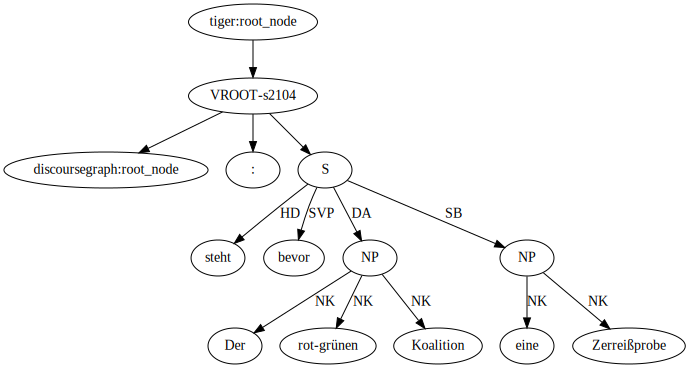

In [149]:
%dotstr tdg_pydot.to_string()

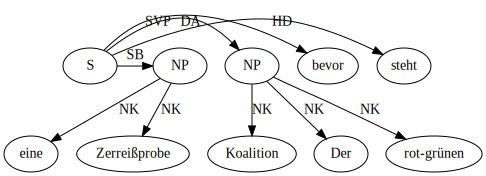

In [160]:
%dotstr open('/tmp/mini.dot').read().decode('utf8')

# TODO: set rank=same automatically for nodes which align horizontally

http://stackoverflow.com/questions/20910596/line-up-the-heads-of-dot-graph-using-pydot